In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image, ImageFont
#from IPython.display import Image 
#import Pillow
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
#from keras.models import sequential
#from tensorflow.keras import sequential
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dense,Flatten,Dropout

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error loading image')
        
data = np.array(data)
labels = np.array(labels)
        
    
    

In [4]:
#split train data into train and test
print(data.shape,labels.shape)

X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


The architecture of our model is:

2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)
MaxPool2D layer ( pool_size=(2,2))
Dropout layer (rate=0.25)
2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)
MaxPool2D layer ( pool_size=(2,2))
Dropout layer (rate=0.25)
Flatten layer to squeeze the layers into 1 dimension
Dense Fully connected layer (256 nodes, activation=”relu”)
Dropout layer (rate=0.5)
Dense layer (43 nodes, activation=”softmax”)

In [5]:
#Building a model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))



In [6]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
#train & validate the model
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15
981/981 [==============================] - 145s 146ms/step - loss: 1.7354 - accuracy: 0.5666 - val_loss: 0.2547 - val_accuracy: 0.9396
Epoch 2/15
981/981 [==============================] - 143s 145ms/step - loss: 0.4491 - accuracy: 0.8727 - val_loss: 0.1198 - val_accuracy: 0.9716
Epoch 3/15
981/981 [==============================] - 145s 148ms/step - loss: 0.3067 - accuracy: 0.9152 - val_loss: 0.0735 - val_accuracy: 0.9818
Epoch 4/15
981/981 [==============================] - 131s 134ms/step - loss: 0.2526 - accuracy: 0.9285 - val_loss: 0.0727 - val_accuracy: 0.9819
Epoch 5/15
981/981 [==============================] - 134s 137ms/step - loss: 0.2461 - accuracy: 0.9340 - val_loss: 0.0543 - val_accuracy: 0.9852
Epoch 6/15
981/981 [==============================] - 137s 140ms/step - loss: 0.2297 - accuracy: 0.9394 - val_loss: 0.0588 - val_accuracy: 0.9851
Epoch 7/15
981/981 [==============================] - 139s 141ms/step - loss: 0.1940 - accuracy: 0.9492 - val_loss: 0.1033 -

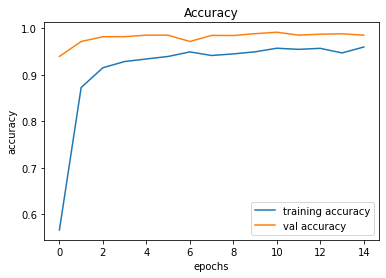

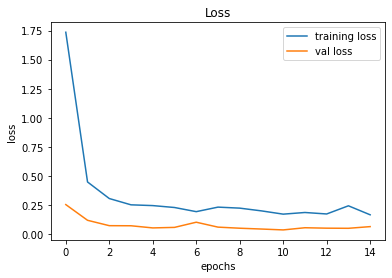

In [8]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [9]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('traffic_classifier.h5')

C:\Users\udai\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9471892319873317
